# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from bayes_classifier.bayes_classifier import bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Vertebral Column 3C dataset

In [2]:
Xy = pd.read_csv('./datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
b_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
b_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
b_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.7741935483870968, 0.7258064516129032, 0.8064516129032258, 0.8387096774193549, 0.8870967741935484, 0.7741935483870968, 0.8064516129032258, 0.8064516129032258, 0.8225806451612904, 0.8870967741935484, 0.8064516129032258, 0.8064516129032258, 0.8548387096774194, 0.7741935483870968, 0.7258064516129032, 0.8387096774193549, 0.7741935483870968, 0.8225806451612904, 0.7741935483870968, 0.8064516129032258]

Accuracy:
0.8056451612903224

Standard Deviation:
0.042513081784184524

Confusion Matrix:
    DH  SL  NO
DH   6   0   4
SL   0  26   2
NO   8   0  16
    NO  SL  DH
NO  15   2   6
SL   1  26   1
DH   7   0   4
    SL  NO  DH
SL  28   4   1
NO   0  12   3
DH   0   4  10
    SL  DH  NO
SL  34   0   2
DH   0   9   4
NO   1   3   9
    NO  DH  SL
NO  19   3   0
DH   3  10   0
SL   1   0  26
    NO  DH  SL
NO  16   2   2
DH   8   7   0
SL   2   0  25
    SL  NO  DH
SL  34   4   0
NO   0  10   2
DH   0   6   6
    NO  SL  DH
NO  19   1   6
SL

# Confusion Matrix Mean

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,DH,SL,NO
DH,7,0,4
SL,0,28,1
NO,4,1,14


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.6612903225806451, 0.7258064516129032, 0.8064516129032258, 0.7903225806451613, 0.7903225806451613, 0.8225806451612904, 0.7741935483870968, 0.7903225806451613, 0.6935483870967742, 0.8387096774193549, 0.6935483870967742, 0.7258064516129032, 0.7258064516129032, 0.7741935483870968, 0.7096774193548387, 0.7903225806451613, 0.8225806451612904, 0.7096774193548387, 0.7096774193548387, 0.7580645161290323]

Accuracy:
0.7556451612903226

Standard Deviation:
0.049784917206615

Confusion Matrix:
    DH  SL  NO
DH   7   0   3
SL   4  21   3
NO  11   0  13
    NO  SL  DH
NO  15   1   7
SL   4  21   3
DH   2   0   9
    SL  NO  DH
SL  27   5   1
NO   0  11   4
DH   0   2  12
    SL  DH  NO
SL  29   1   6
DH   0  11   2
NO   1   3   9
    NO  DH  SL
NO  14   7   1
DH   4   9   0
SL   1   0  26
    NO  DH  SL
NO  14   4   2
DH   4  11   0
SL   1   0  26
    SL  NO  DH
SL  33   4   1
NO   1   8   3
DH   0   5   7
    NO  SL  DH
NO  18   1   7
SL   

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,DH,SL,NO
DH,9,0,2
SL,1,25,3
NO,6,1,12


# Showing bayes informations computed

In [8]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[0.7580645161290323, 0.8064516129032258, 0.8548387096774194, 0.8709677419354839, 0.8225806451612904, 0.7741935483870968, 0.8225806451612904, 0.8225806451612904, 0.7741935483870968, 0.8387096774193549, 0.8709677419354839, 0.8548387096774194, 0.8387096774193549, 0.8548387096774194, 0.7903225806451613, 0.8225806451612904, 0.7903225806451613, 0.8064516129032258, 0.7741935483870968, 0.8870967741935484]

Accuracy:
0.8217741935483872

Standard Deviation:
0.036236519255904806

Confusion Matrix:
    DH  SL  NO
DH   5   2   3
SL   0  27   1
NO   8   1  15
    NO  SL  DH
NO  14   3   6
SL   0  28   0
DH   3   0   8
    SL  NO  DH
SL  32   1   0
NO   0  12   3
DH   1   4   9
    SL  DH  NO
SL  35   0   1
DH   1  10   2
NO   1   3   9
    NO  DH  SL
NO  14   7   1
DH   2  10   1
SL   0   0  27
    NO  DH  SL
NO  13   4   3
DH   4  10   1
SL   2   0  25
    SL  NO  DH
SL  37   1   0
NO   0   9   3
DH   2   5   5
    NO  SL  DH
NO  19   2   5


In [9]:
confusion_matrix_mean(b_confusion_matrix_list)

,DH,SL,NO
DH,8,0,2
SL,0,29,0
NO,5,1,13


# Choosing two columns from the last X_train and X_test to plot decision surface

In [10]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
         0      1
32   44.94  17.44
8    43.79  13.53
265  48.17   9.59
25   54.12  26.65
299  82.91  29.89
..     ...    ...
289  44.43  14.17
34   59.60  32.00
27   43.58  16.51
95   57.52  33.65
90   81.66  28.75

[248 rows x 2 columns]
Test dataset:
         0      1
279  48.80  18.02
308  45.25   8.69
155  66.80  14.55
36   32.09   6.99
309  33.84   5.07
..     ...    ...
179  68.72  49.43
15   44.32  12.54
228  38.05   8.30
22   63.07  24.41
120  54.74  12.10

[62 rows x 2 columns]


# Training the models with the new dataset 2d

In [14]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

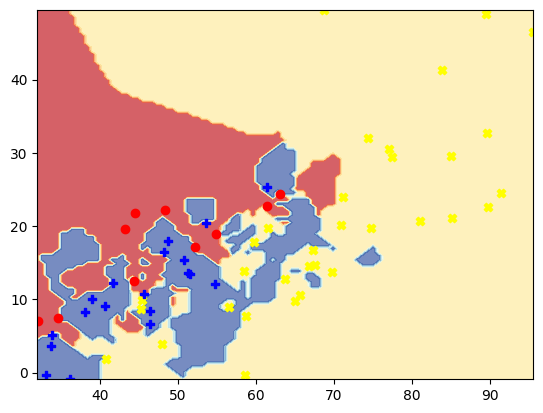

In [15]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

dh = np.where(knn_y_pred == 'DH')
sl = np.where(knn_y_pred == 'SL')
no = np.where(knn_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting dmc decision surface

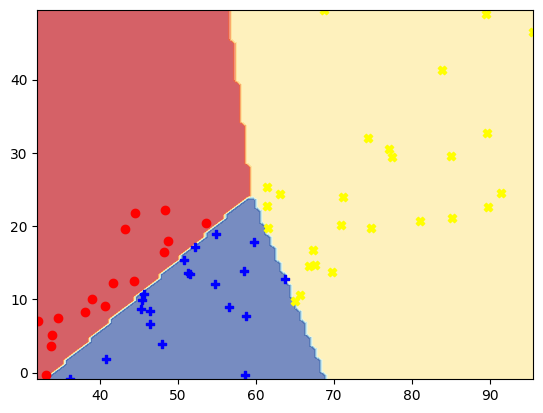

In [16]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

dh = np.where(dmc_y_pred == 'DH')
sl = np.where(dmc_y_pred == 'SL')
no = np.where(dmc_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting naive bayes decision surface

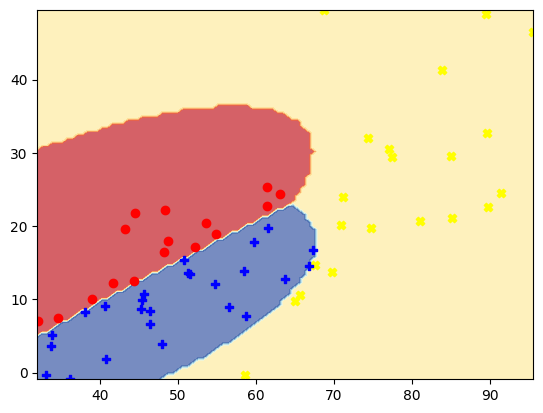

In [17]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

dh = np.where(b_y_pred == 'DH')
sl = np.where(b_y_pred == 'SL')
no = np.where(b_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()